<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

#  Data Science and AI
## Lab 7.1.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
The scenario that can become the potential problem definition will be that whether a person will donate blood or not

## Actual Question
The ideal problem definition would be whether a ggiven person can likely to donate blood in the future categorized into classes as 0s and 1s. 1- person donating blood

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [ ]:
# Find the dataset described above 
# Hint: search for it through the UCI Machine Learning Repository

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Read data in pandas
transfusion = pd.read_csv('/Users/winifredwetthasinghe/Documents/Data_Science_Course_UTS/Labs/Module 7/transfusion.csv')
transfusion
# Check data has loaded correctly

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [3]:
transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [4]:
transfusion.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [5]:
len(transfusion.columns)

5

In [6]:
transfusion.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [7]:
transfusion.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


array([[<AxesSubplot:title={'center':'Recency (months)'}>,
        <AxesSubplot:title={'center':'Frequency (times)'}>],
       [<AxesSubplot:title={'center':'Monetary (c.c. blood)'}>,
        <AxesSubplot:title={'center':'Time (months)'}>],
       [<AxesSubplot:title={'center':'whether he/she donated blood in March 2007'}>,
        <AxesSubplot:>]], dtype=object)

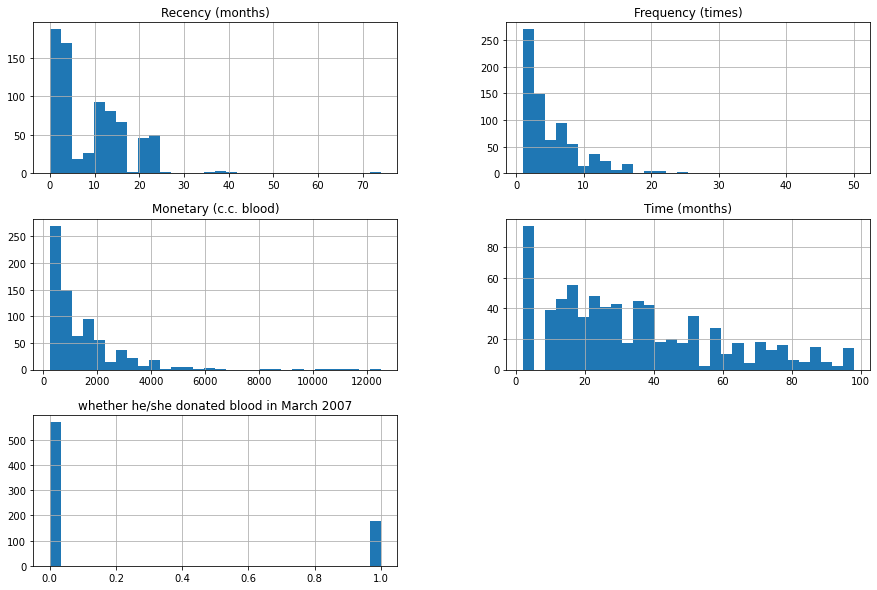

In [8]:
transfusion.hist(bins=30, figsize=(15, 10))

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [9]:
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [10]:
transfusion.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [11]:
transfusion.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [12]:
transfusion.isnull()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
743,False,False,False,False,False
744,False,False,False,False,False
745,False,False,False,False,False
746,False,False,False,False,False


In [13]:
transfusion.isna().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [14]:
transfusion.isna().sum().sum()

0

In [ ]:
# Filter/subset/clean the data according to your EDA findings

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [15]:
y= transfusion['whether he/she donated blood in March 2007']
y

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: whether he/she donated blood in March 2007, Length: 748, dtype: int64

Text(0, 0.5, 'Count')

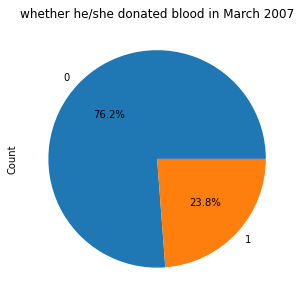

In [16]:
plt.figure(figsize=(8,5))


transfusion['whether he/she donated blood in March 2007'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',shadow=False)
plt.title('whether he/she donated blood in March 2007')
plt.ylabel('Count')

In [17]:
transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [18]:
transfusion.corr()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
whether he/she donated blood in March 2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


In [19]:
transfusion.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [20]:

X = transfusion[['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']]

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [21]:
test_size = 0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 30)

In [ ]:
# Split your data


# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [ ]:
# Choose a model or models

In [26]:
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn import ensemble

In [39]:
clf_rf = ensemble.RandomForestClassifier(n_estimators=100, random_state = 50, verbose=1)


# Step 9: Fit the Model

In [28]:
# Fit model

In [29]:
clf_rf.fit(X_train, y_train)

y_pred_test =clf_rf.predict(X_test)
y_pred_train =clf_rf.predict(X_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

We are testing both train and test together

In [ ]:
# Evaluate model against training set

In [30]:
accuracy_score(y_test, y_pred_test)

0.7620320855614974

In [32]:
cfm=confusion_matrix(y_test, y_pred_test)
TP = cfm[1, 1]
TN = cfm[0, 0]
FP = cfm[0, 1]
FN = cfm[1, 0]
(TP,FP,FN,TN)
cfm

array([[257,  30],
       [ 59,  28]])

In [33]:
recall = recall_score(y_test, y_pred_test)
recall

0.3218390804597701

In [34]:
def summary_report(actual,prediction):
    
    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    
    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

In [35]:
summary_report(y_test, y_pred_test)

Accuracy : 0.7620 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.4828 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.3218 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


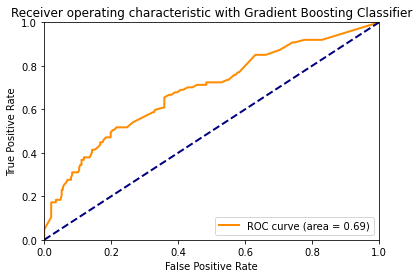

In [36]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf_rf.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Gradient Boosting Classifier')
plt.legend(loc = "lower right")
plt.show()

In [37]:
y_pred_test = clf_rf.predict(X_test)
test_acc=accuracy_score(y_test, y_pred_test)

y_pred_train = clf_rf.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)

print('train: %.3f, test: %.3f' % (train_acc, test_acc))

train: 0.963, test: 0.762


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

We are testing both train and test together

In [ ]:
# Evaluate model against test set

In [38]:
from sklearn.model_selection import GridSearchCV

In [41]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
CV_rfc.best_params_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

{'max_features': 'auto', 'n_estimators': 200}

>1, train: 0.963, test: 0.767
>2, train: 0.963, test: 0.757
>3, train: 0.963, test: 0.762
>4, train: 0.963, test: 0.770
>5, train: 0.963, test: 0.759
>6, train: 0.963, test: 0.759
>7, train: 0.963, test: 0.762
>8, train: 0.963, test: 0.762
>9, train: 0.963, test: 0.773
>10, train: 0.963, test: 0.762
>11, train: 0.963, test: 0.757
>12, train: 0.963, test: 0.773
>13, train: 0.963, test: 0.759
>14, train: 0.963, test: 0.765
>15, train: 0.963, test: 0.773
>16, train: 0.963, test: 0.762
>17, train: 0.963, test: 0.767
>18, train: 0.963, test: 0.762
>19, train: 0.963, test: 0.759
>20, train: 0.960, test: 0.762
>21, train: 0.963, test: 0.767
>22, train: 0.963, test: 0.767
>23, train: 0.963, test: 0.765
>24, train: 0.963, test: 0.762
>25, train: 0.963, test: 0.754
>26, train: 0.963, test: 0.765
>27, train: 0.963, test: 0.773
>28, train: 0.963, test: 0.765
>29, train: 0.963, test: 0.759


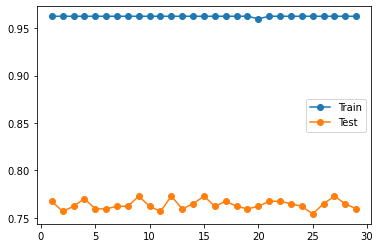

In [42]:
# # define lists to collect scores
train_scores, test_scores = list(), list()
# # define the tree depths to evaluate
values = [i for i in range(1, 30)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	clf=ensemble.RandomForestClassifier()
    
	# fit model on the training dataset
	clf.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = clf.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = clf.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

This is the model that predicts the likelihood of whether a person would donate blooda in March 2017. The decision tree classifier has an accuracy of 0.76, and a recall of 0.32. AUC score of 0.69. The model is heavily overfitting. At the optimum hyper parameter the model should perform considerably well. This model needs more impoving.

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



